In [1]:
pip install numpy matplotlib pandas scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
breast_cancer = load_breast_cancer()
california_housing = fetch_california_housing()
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_california_housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [4]:
df_breast_cancer["target"] = breast_cancer.target
df_california_housing["target"] = california_housing.target

# Breast Cancer

### - Analise descritiva e exploratória

In [5]:
df_breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


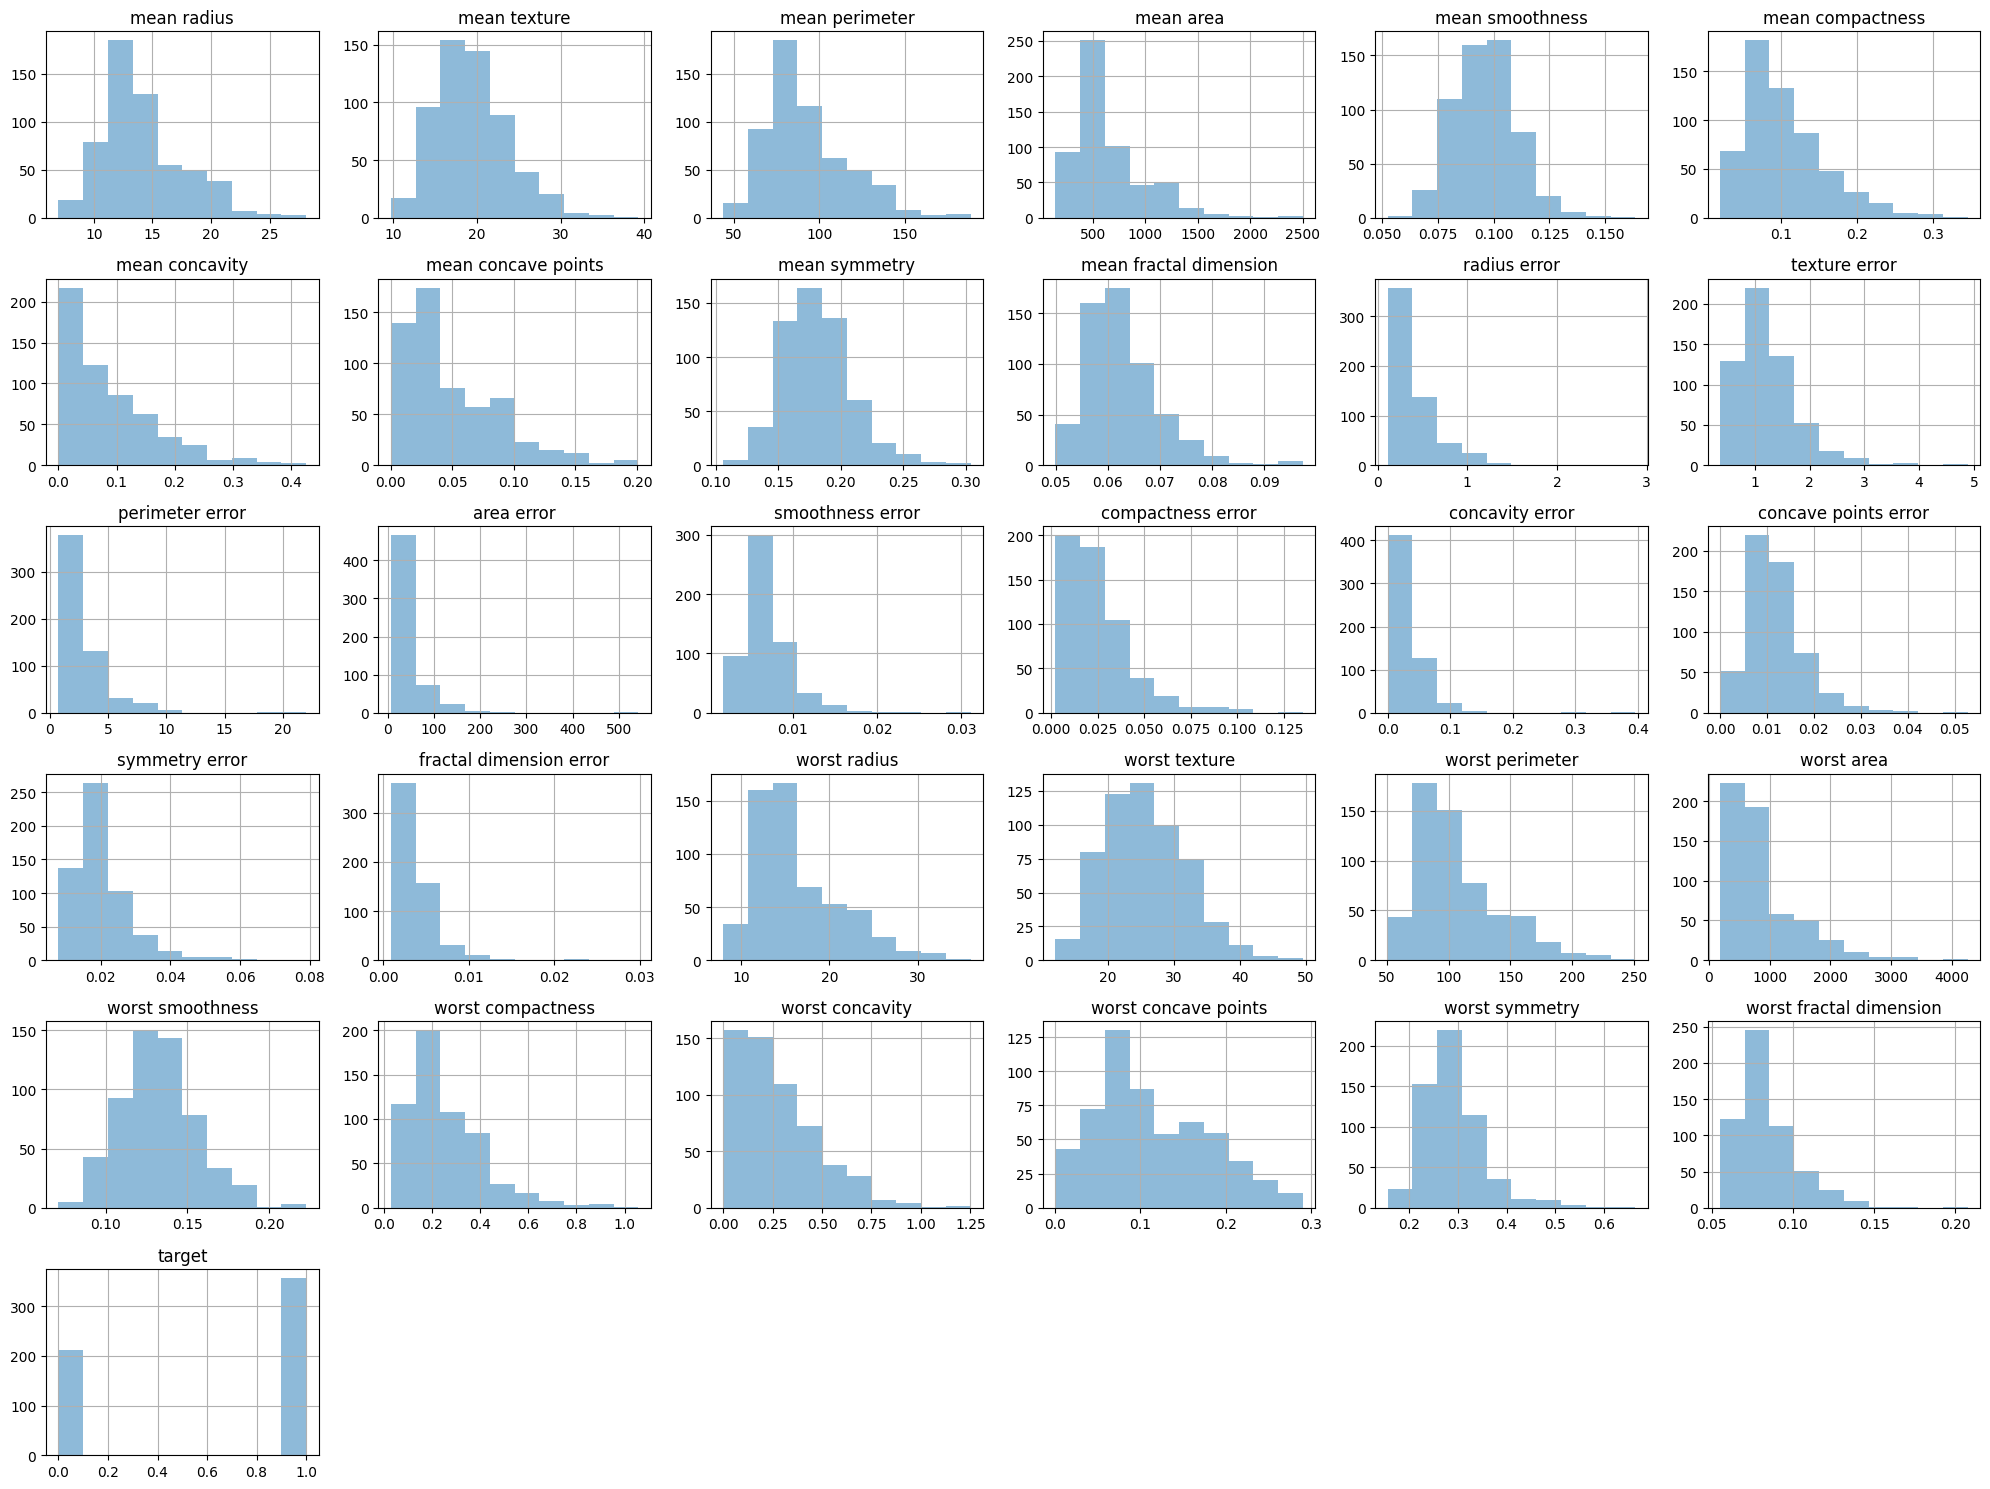

In [6]:
df_breast_cancer.hist(alpha=0.5, figsize=(20, 15))
plt.tight_layout()
plt.show()

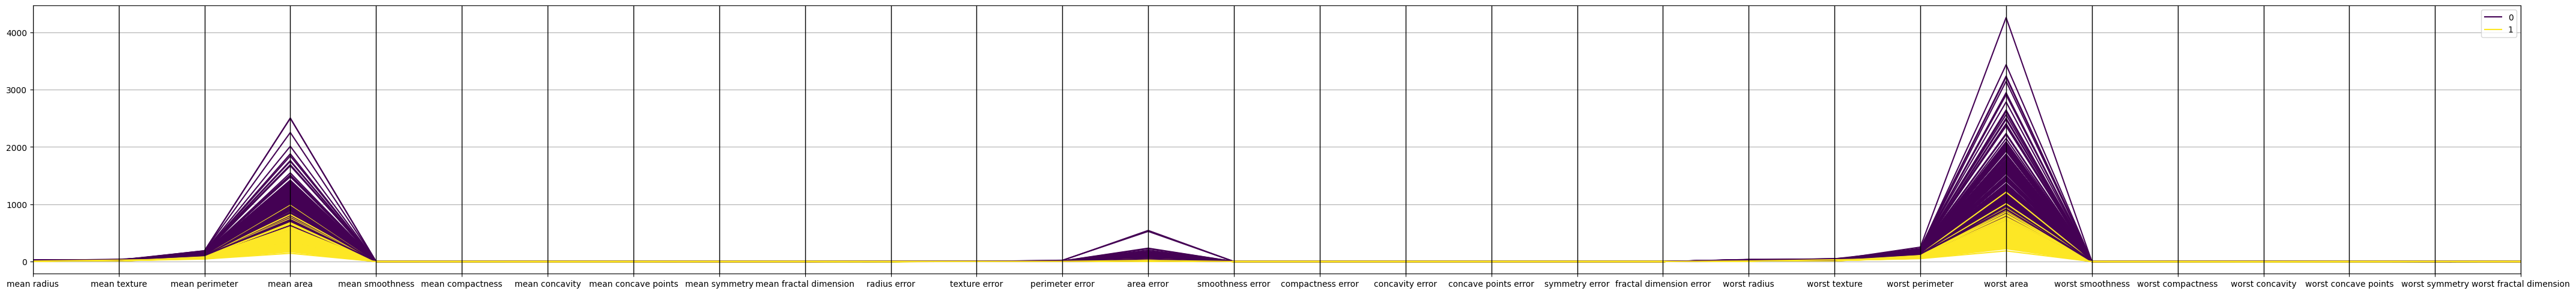

In [7]:
fig, ax = plt.subplots(figsize=(43, 5))
pd.plotting.parallel_coordinates(df_breast_cancer, class_column='target', ax=ax, colormap='viridis')
plt.tight_layout()
plt.show()

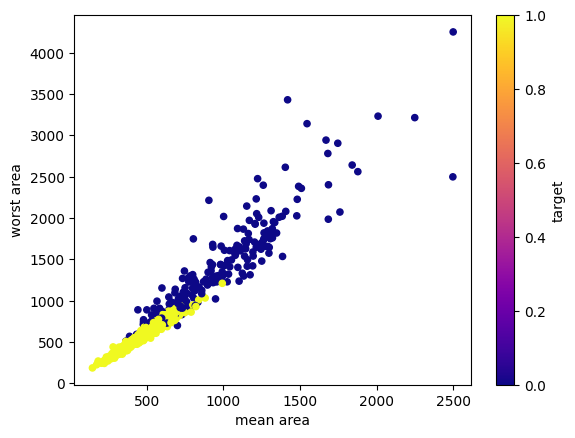

In [8]:
df_breast_cancer.plot(kind='scatter', x='mean area', y='worst area', c='target', colormap='plasma');

In [9]:
breast_cancer_values= df_breast_cancer.drop('target', axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
breast_cancer_values_scaled = min_max_scaler.fit_transform(breast_cancer_values)
df_breast_cancer_normalized = pd.DataFrame(breast_cancer_values_scaled)
df_breast_cancer_normalized['target'] = df_breast_cancer['target']
df_breast_cancer_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### - Treinamento e comparação

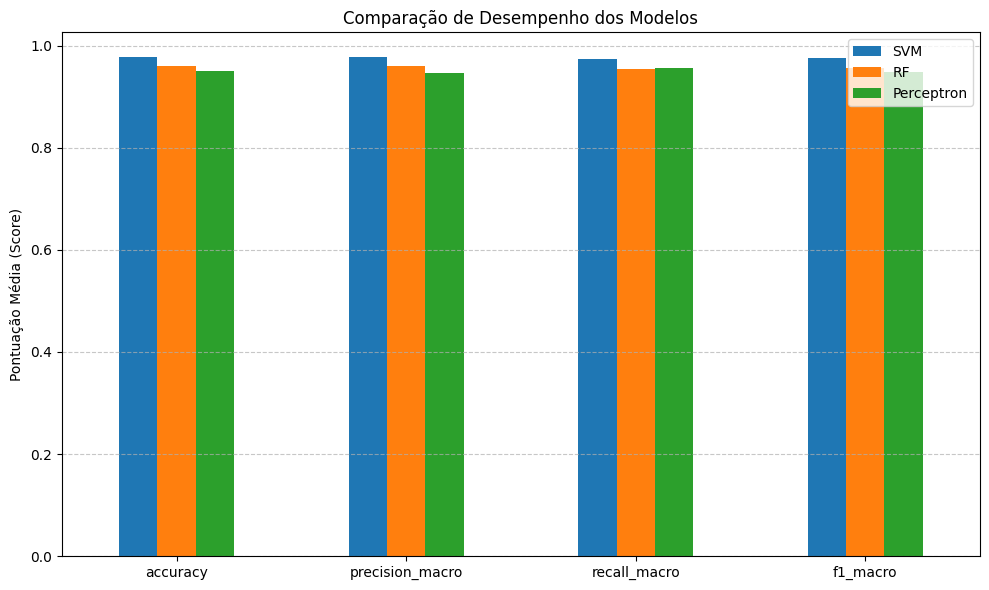

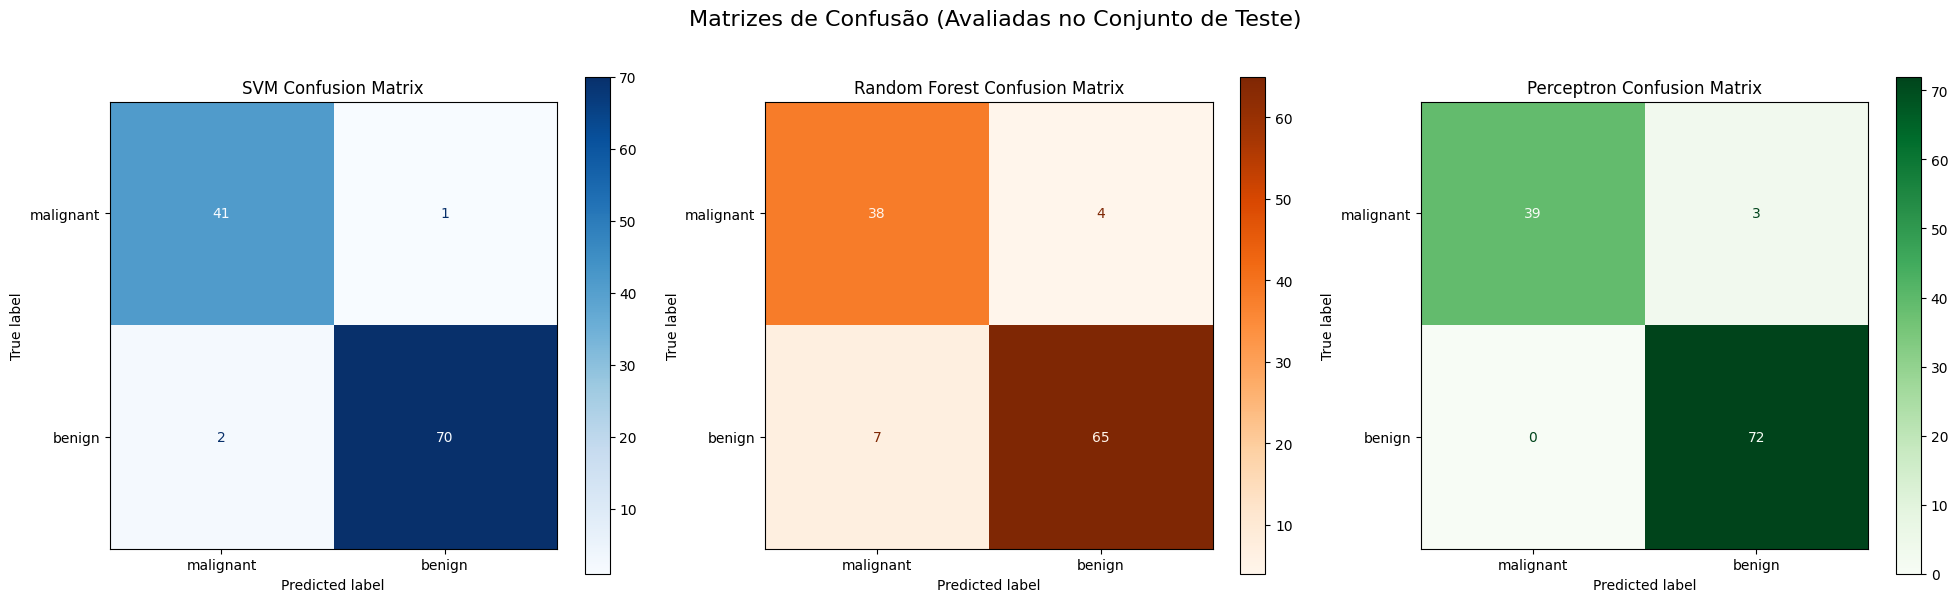

In [10]:
clf_svm = SVC()
clf_rf = RandomForestClassifier()
clf_pt = Perceptron()
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(breast_cancer_values_scaled, df_breast_cancer['target'], test_size=0.2, stratify=df_breast_cancer['target'])
clf_svm.fit(dados_treino, rotulos_treino)
clf_rf.fit(dados_treino, rotulos_treino)
clf_pt.fit(dados_treino, rotulos_treino)

# Como eu treinei com dados normalizados para fazer o cross validate, preciso normalizar cada fold.
pipeline_svm = Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('model', clf_svm)
])
pipeline_rf = Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('model', clf_rf)
])
pipeline_pt = Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('model', clf_pt)
])
scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(pipeline_svm, breast_cancer_values, df_breast_cancer['target'], cv=4, scoring=scoring_list)
scores_rf = cross_validate(pipeline_rf, breast_cancer_values, df_breast_cancer['target'], cv=4, scoring=scoring_list)
scores_pt = cross_validate(pipeline_pt, breast_cancer_values, df_breast_cancer['target'], cv=4, scoring=scoring_list)
avg_scores_svm = []
avg_scores_rf = []
avg_scores_pt = []
for score in scoring_list:
    avg_scores_svm.append(scores_svm['test_'+score].mean())
    avg_scores_rf.append(scores_rf['test_'+score].mean())
    avg_scores_pt.append(scores_pt['test_'+score].mean())
df_results = pd.DataFrame({'SVM': avg_scores_svm,
                   'RF': avg_scores_rf,
                   'Perceptron': avg_scores_pt}, index=scoring_list)
ax = df_results.plot.bar(rot=0, figsize=(10, 6))
plt.title('Comparação de Desempenho dos Modelos')
plt.ylabel('Pontuação Média (Score)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


pred_svm_test = clf_svm.predict(dados_teste)
pred_rf_test = clf_rf.predict(dados_teste)
pred_pt_test = clf_pt.predict(dados_teste)
class_names = df_breast_cancer['target'].unique() 
try:
    class_names = breast_cancer.target_names
except:
    pass
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Matrizes de Confusão (Avaliadas no Conjunto de Teste)', fontsize=16)
cm_svm = confusion_matrix(rotulos_teste, pred_svm_test)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')
cm_rf = confusion_matrix(rotulos_teste, pred_rf_test)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(ax=axes[1], cmap='Oranges')
axes[1].set_title('Random Forest Confusion Matrix')
cm_pt = confusion_matrix(rotulos_teste, pred_pt_test)
disp_pt = ConfusionMatrixDisplay(confusion_matrix=cm_pt, display_labels=class_names)
disp_pt.plot(ax=axes[2], cmap='Greens')
axes[2].set_title('Perceptron Confusion Matrix')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# California Housing

### - Analise descritiva e exploratória

In [11]:
df_california_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


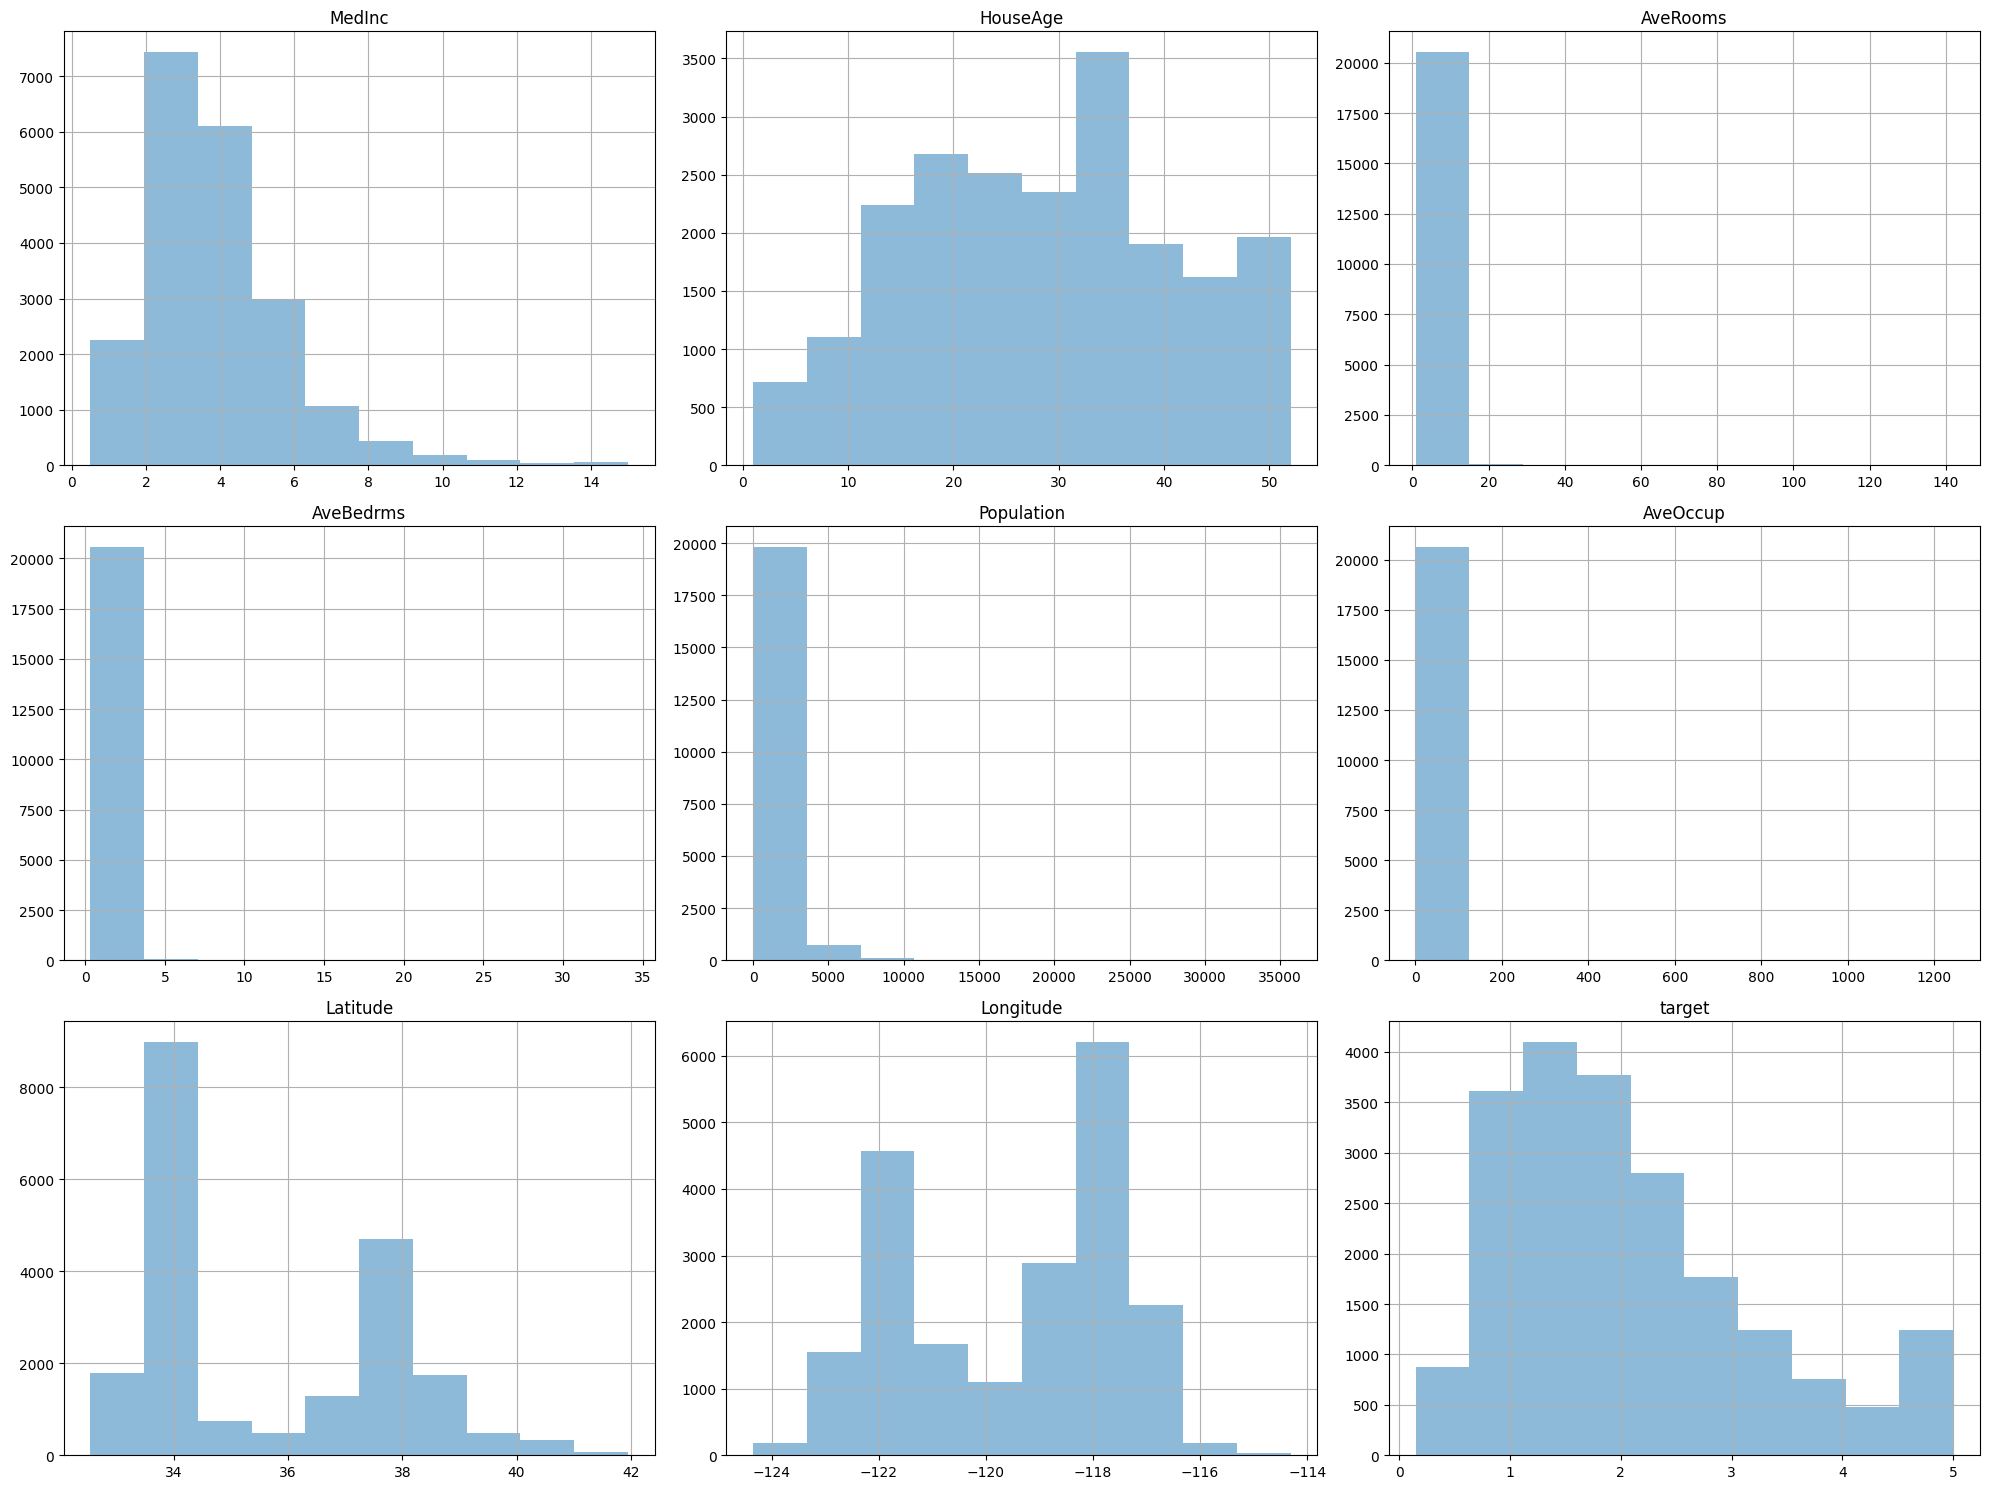

In [12]:
df_california_housing.hist(alpha=0.5, figsize=(20, 15))
plt.tight_layout()
plt.show()

price quantile
Cheapest (25%)              5162
Lower-Middle Price (25%)    5161
Most Expensive (25%)        5160
Upper-Middle Price (25%)    5157
Name: count, dtype: int64


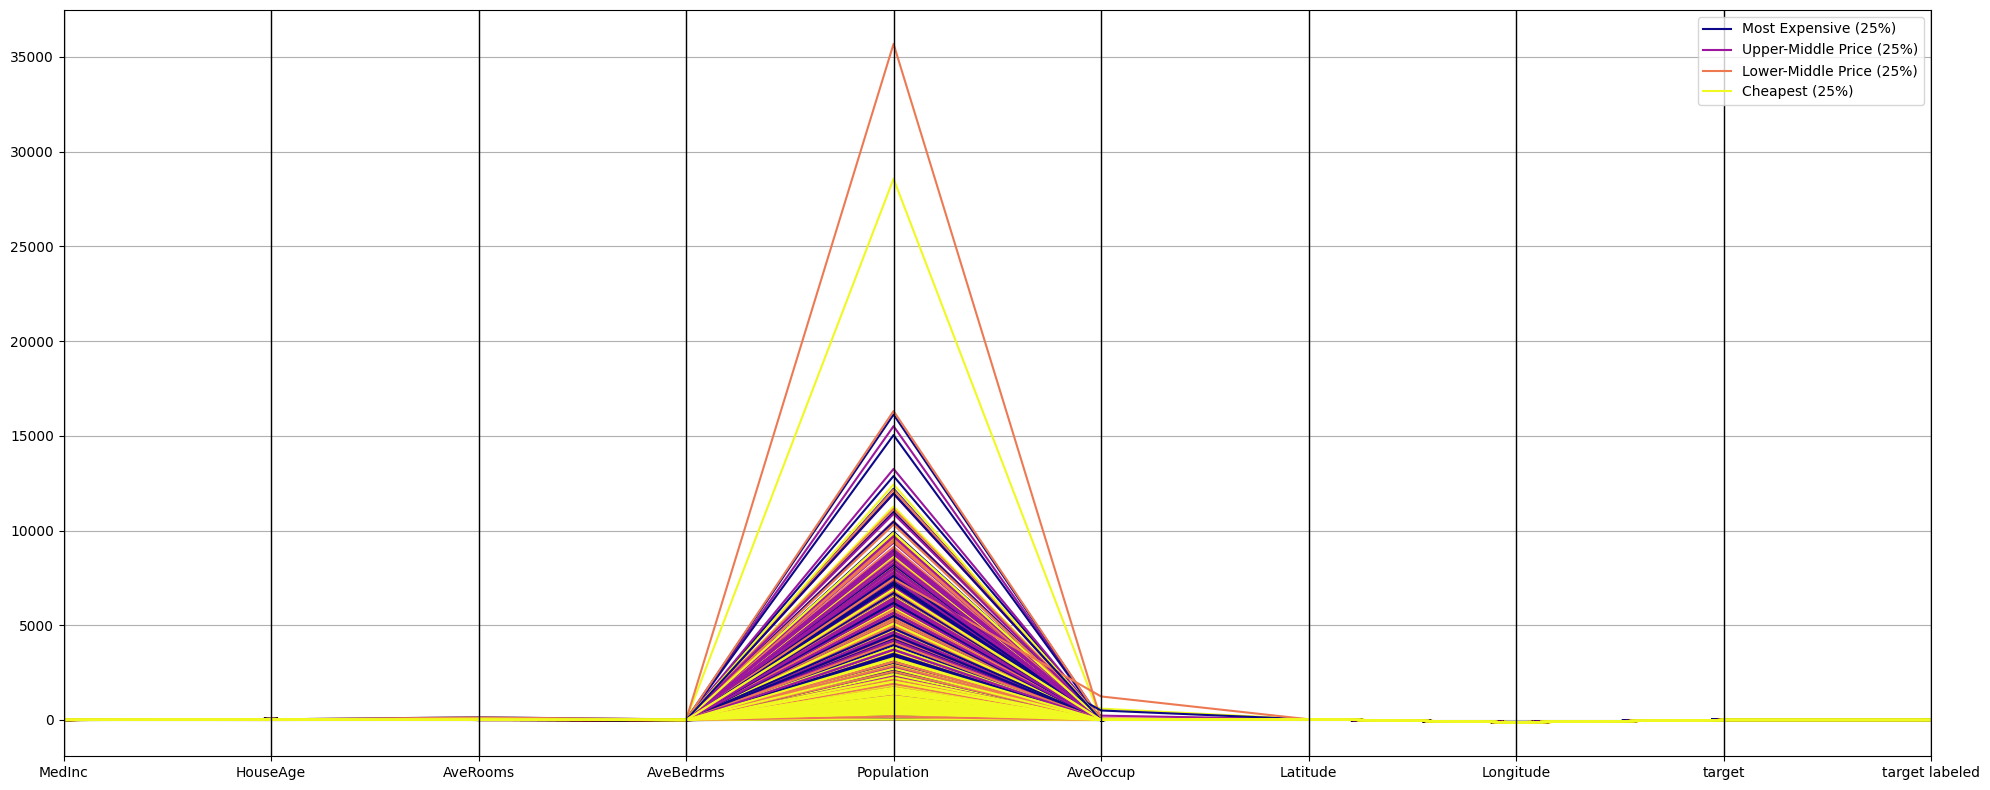

In [13]:
df_california_housing['target labeled'] = df_california_housing['target']
quantile_labels = ['Cheapest (25%)', 'Lower-Middle Price (25%)', 'Upper-Middle Price (25%)', 'Most Expensive (25%)']
df_california_housing['price quantile'] = pd.qcut(df_california_housing['target labeled'], q=4, labels=quantile_labels)
print(df_california_housing['price quantile'].value_counts())
fig, ax = plt.subplots(figsize=(20, 8))
pd.plotting.parallel_coordinates(df_california_housing, class_column='price quantile', ax=ax, colormap='plasma')
plt.tight_layout()
plt.show()

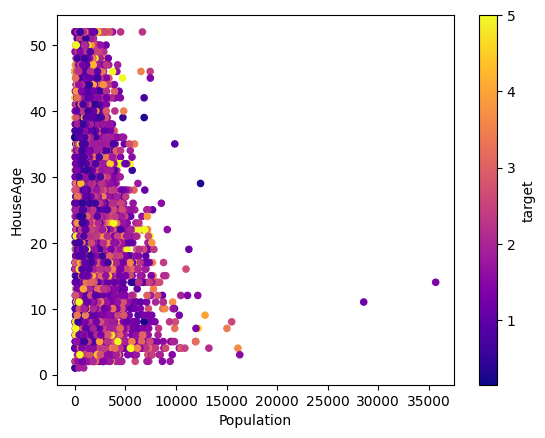

In [14]:
df_california_housing.plot(kind='scatter', x='Population', y='HouseAge', c='target', colormap='plasma');

In [15]:
california_housing_values= df_california_housing.drop(columns= ['target','target labeled','price quantile']).values
min_max_scaler = preprocessing.MinMaxScaler()
california_housing_values_scaled = min_max_scaler.fit_transform(california_housing_values)
df_california_housing_normalized = pd.DataFrame(california_housing_values_scaled)
df_california_housing_normalized['target'] = df_california_housing['target']
df_california_housing_normalized.describe()

,0,1,2,3,4,5,6,7,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,2.068558
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,1.153956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149990
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,1.196000
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,1.797000
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,2.647250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000010


### - Treinamento e comparação

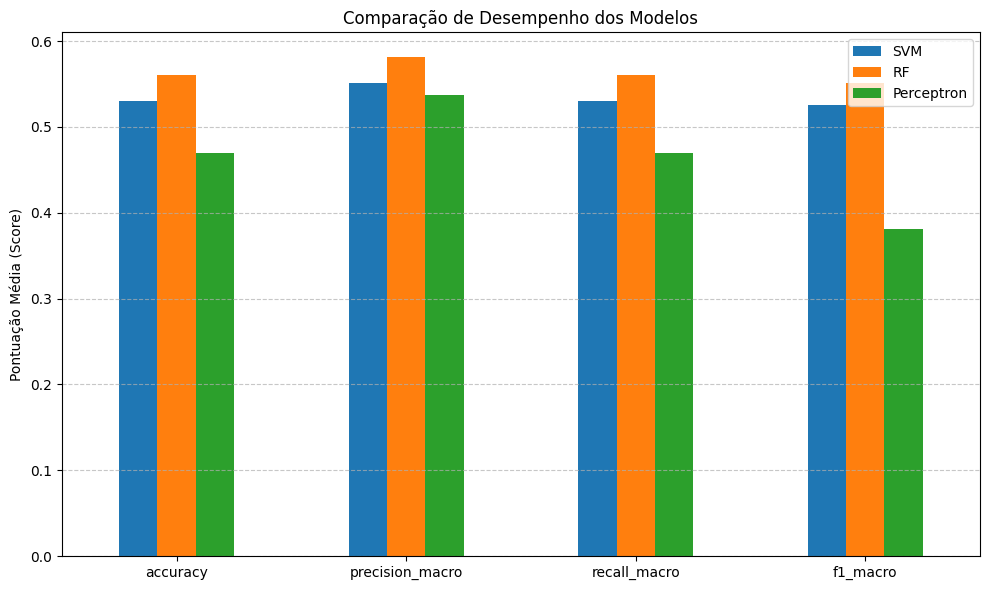

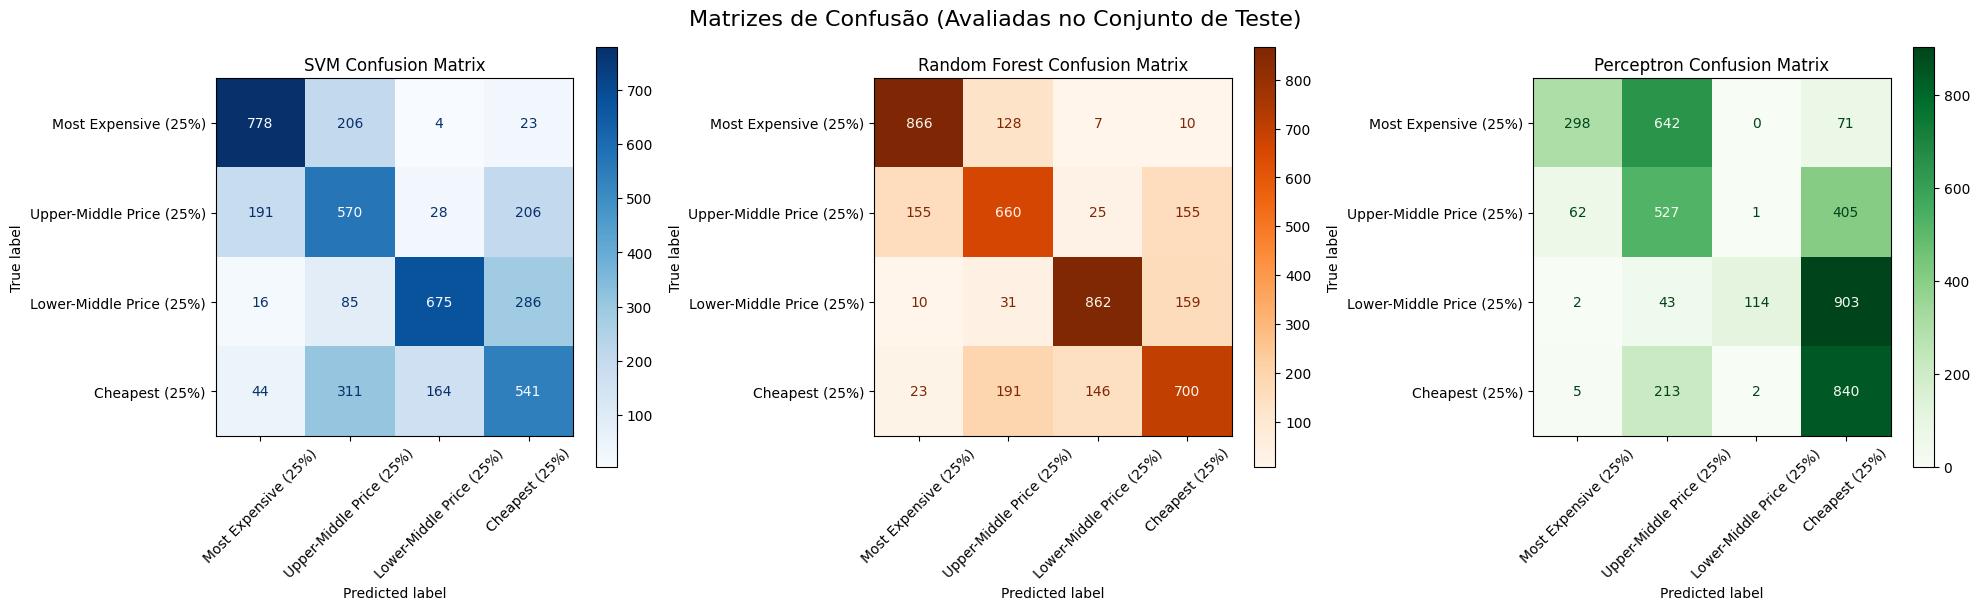

In [16]:
clf_svm = SVC()
clf_rf = RandomForestClassifier()
clf_pt = Perceptron()
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(california_housing_values_scaled, df_california_housing['price quantile'], test_size=0.2)
clf_svm.fit(dados_treino, rotulos_treino)
clf_rf.fit(dados_treino, rotulos_treino)
clf_pt.fit(dados_treino, rotulos_treino)

# Como eu treinei com dados normalizados para fazer o cross validate, preciso normalizar cada fold.
pipeline_svm = Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('model', clf_svm)
])
pipeline_rf = Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('model', clf_rf)
])
pipeline_pt = Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('model', clf_pt)
])
scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(pipeline_svm, california_housing_values, df_california_housing['price quantile'], cv=4, scoring=scoring_list)
scores_rf = cross_validate(pipeline_rf, california_housing_values, df_california_housing['price quantile'], cv=4, scoring=scoring_list)
scores_pt = cross_validate(pipeline_pt, california_housing_values, df_california_housing['price quantile'], cv=4, scoring=scoring_list)
avg_scores_svm = []
avg_scores_rf = []
avg_scores_pt = []
for score in scoring_list:
    avg_scores_svm.append(scores_svm['test_'+score].mean())
    avg_scores_rf.append(scores_rf['test_'+score].mean())
    avg_scores_pt.append(scores_pt['test_'+score].mean())
df_results = pd.DataFrame({'SVM': avg_scores_svm,
                   'RF': avg_scores_rf,
                   'Perceptron': avg_scores_pt}, index=scoring_list)
ax = df_results.plot.bar(rot=0, figsize=(10, 6))
plt.title('Comparação de Desempenho dos Modelos')
plt.ylabel('Pontuação Média (Score)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


pred_svm_test = clf_svm.predict(dados_teste)
pred_rf_test = clf_rf.predict(dados_teste)
pred_pt_test = clf_pt.predict(dados_teste)
class_names = df_california_housing['price quantile'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Matrizes de Confusão (Avaliadas no Conjunto de Teste)', fontsize=16)
cm_svm = confusion_matrix(rotulos_teste, pred_svm_test)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(ax=axes[0], cmap='Blues',xticks_rotation=45)
axes[0].set_title('SVM Confusion Matrix')
cm_rf = confusion_matrix(rotulos_teste, pred_rf_test)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(ax=axes[1], cmap='Oranges',xticks_rotation=45)
axes[1].set_title('Random Forest Confusion Matrix')
cm_pt = confusion_matrix(rotulos_teste, pred_pt_test)
disp_pt = ConfusionMatrixDisplay(confusion_matrix=cm_pt, display_labels=class_names)
disp_pt.plot(ax=axes[2], cmap='Greens',xticks_rotation=45)
axes[2].set_title('Perceptron Confusion Matrix')
plt.tight_layout()
plt.show()
